# Comparing Classifiers for Predicting Weight Loss for Fitbit Users

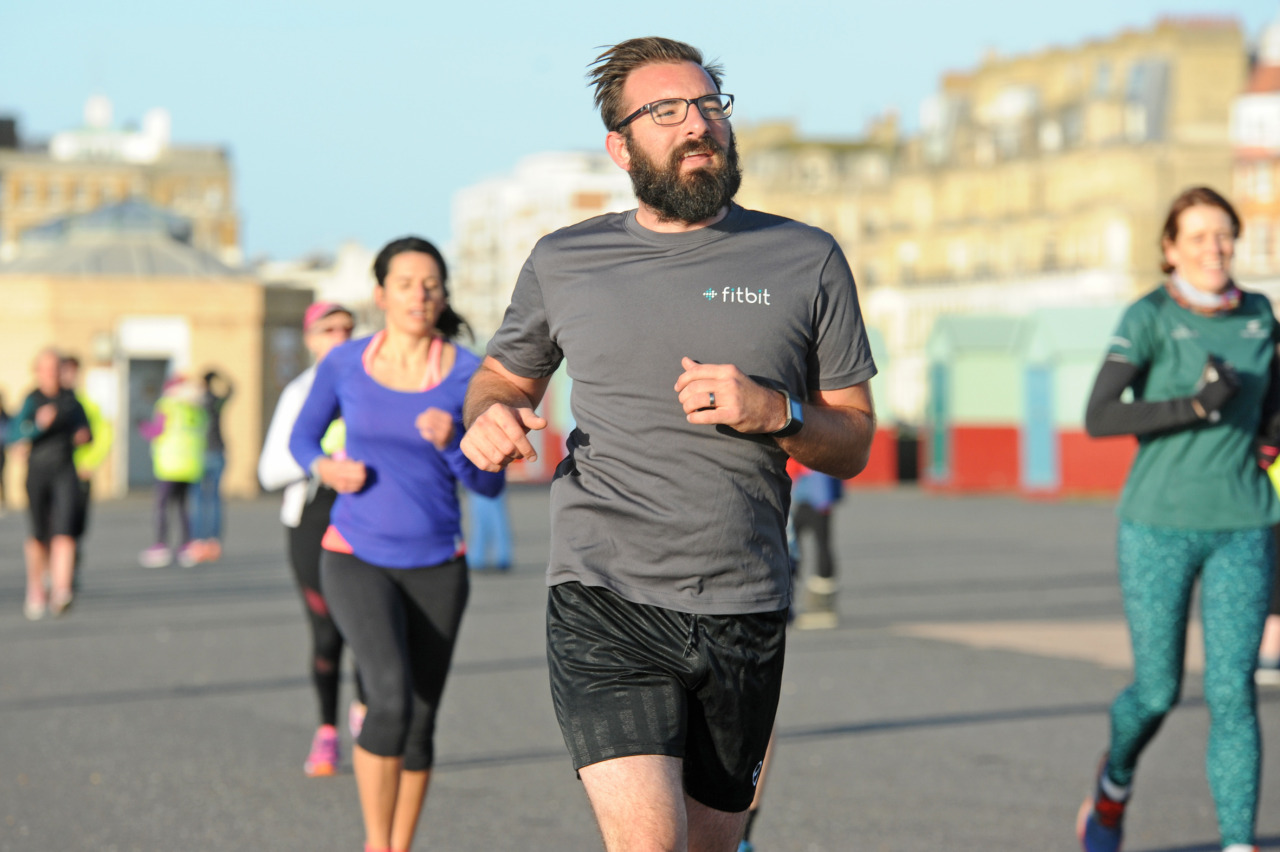

Fitbit is an activity tracker worn on the wrist just like a watch. It tracks your day-to-day activity automatically across a range of exercises like walking, running, swimming, cycling, or gym activity, and then stores this information in an easily-accessible app on your phone.

This Notebook creates ML models for three classifiers (i.e., Logistic Regression, K-Nearest Neighbor (KNN) and Support Vector Machines (SVC) using the Fitbit dataset to see which classifier builds a model with the highest accuracy and the model parameters used for the model.

In [1]:
from statsmodels.tsa.seasonal import seasonal_decompose

import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, StandardScaler
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.inspection import permutation_importance
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV


In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
#Add panda options for column displays
#Print the long values in the columns
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.max_colwidth = 150

**OVERVIEW**

The is the capstone which is a culmination of our time in this program and is meant to showcase our ability to develop and answer a question of interest using the tools we have encountered. This project focuses on both our understanding of predictive modeling using a selection of algorithms covered in the program and our ability to communicate the findings.

#### General idea of the question that I want to ask

Fitness, Wellness and Wellbeing - Can I build ML models to predict the calories of an individual if we use features like exercise types, food intake, water consumption, supplement , dieting etc. What are the important features that would contribute to weight loss? Maybe extend the analysis to Mental health predictions


### Capstone CRISP-DM Overview

### Business Understanding

From a business perspective, I will be trying to identify the key drivers for the prediction question I am trying to answer, for example, for Fitness, Wellness and Wellbeing, are exercise, diet, food consumption the main drivers for weight loss.

#### Determine Business 

For the built model or ensemble of models, can we use it as a way for consumers to predict their weight loss over a period of time as opposed to the current method, where you do the following
- Enter your personal details like weight, height etc
- Enter your target/goals with regards to weight loss
- Track and log your exercise, food and water consumption
- Application displays the weight loss and progress towards your target



#### Assess Situation

Based on the limited work done to date, the main risk that I see is the lack of free quality data that could be used to create a model using the ML algorithms that we are learning on this course. As I refine my ML Question and do some data analysis, my assumptions may change or I may identify additional data sources.

The other issue may be the identification and use of infrastructure with adequate resources to run the algorithms with the data volumes required to produce a model with the right level of accuracy.

A contingency may be to use cloud computing resources which have the benefits of paying for usage but there will be a cost component to the Project.


#### Data Mining Goals

Quite simply, this will be the identification of data sets and analysis work on the data to figure out if the dataset would produce a model with the right level of accuracy.


### Data Understanding

Getting familiar with the data sets involves loading the identified dataset for the ML question, checking for missing data, correlation of the data as it relates to the the ML question, Outliers in the data sets

After considering the business understanding, we want to get familiar with our data. Write down some steps that you would take to get to know the dataset and identify any quality issues within. Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.


In [6]:
# Decribing the data that has been provided using Pandas functions
# Read daily activity log info data file into DataFrame
dailyactivity_df = pd.read_csv("../data/dailyActivity_merged.csv")

# Shape and preview
print('Weight Log Information DataFrame Shape :',dailyactivity_df.shape)
dailyactivity_df.head()

Weight Log Information DataFrame Shape : (940, 15)


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [7]:
# Use Dataframe describe/view some basic statistical details like percentile, mean, std etc. of the dataset
dailyactivity_df.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000


In [8]:
#List how many users are in this dataset
print("Number of Fitbit Users : " , dailyactivity_df.Id.value_counts().count())

Number of Fitbit Users :  33


In [9]:
# Exploring the data, lets start by describing the dataframe to get a list of provided attributes/features
dailyactivity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [10]:
# Print percentage of Columns that are null in relation to the total number of columns
for column in dailyactivity_df.columns:
    if dailyactivity_df[column].isnull().sum() > 0:
        print(column, ': {:.2%}'.format(dailyactivity_df[column].isnull().sum() /
                                               dailyactivity_df[column].shape[0]))

In [11]:
#Check the number of Null Columns
dailyactivity_df.isnull().sum()

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

There are no null features in the Dataset

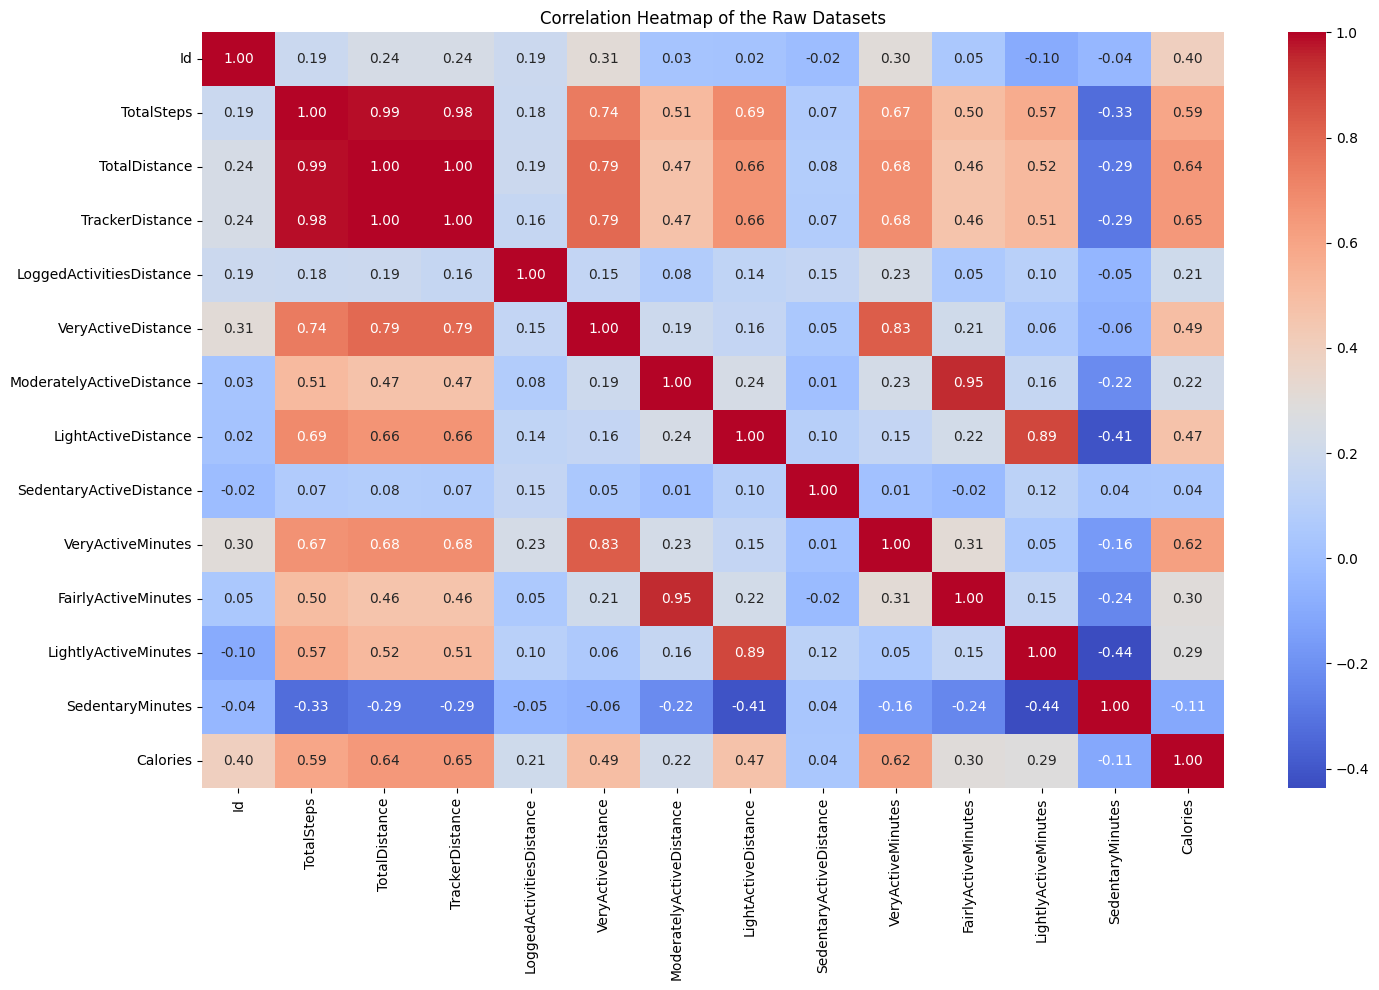

In [34]:
# Create a figure with specified size
plt.figure(figsize=(15, 10))

# Create seaborn heatmap
ax = sns.heatmap(dailyactivity_df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
ax.set_title("Correlation Heatmap of the Raw Datasets")

# Show the plot in full screen
manager = plt.get_current_fig_manager()
manager.full_screen_toggle()
plt.tight_layout()
plt.show()

Strong correlation between Total Distance and Tracker Distance. Very Active Distance also shows a strong correlation with Total Distance and Tracker Distance features.

However, there is weak correlation across the board between the computed weight loss features and the other features.


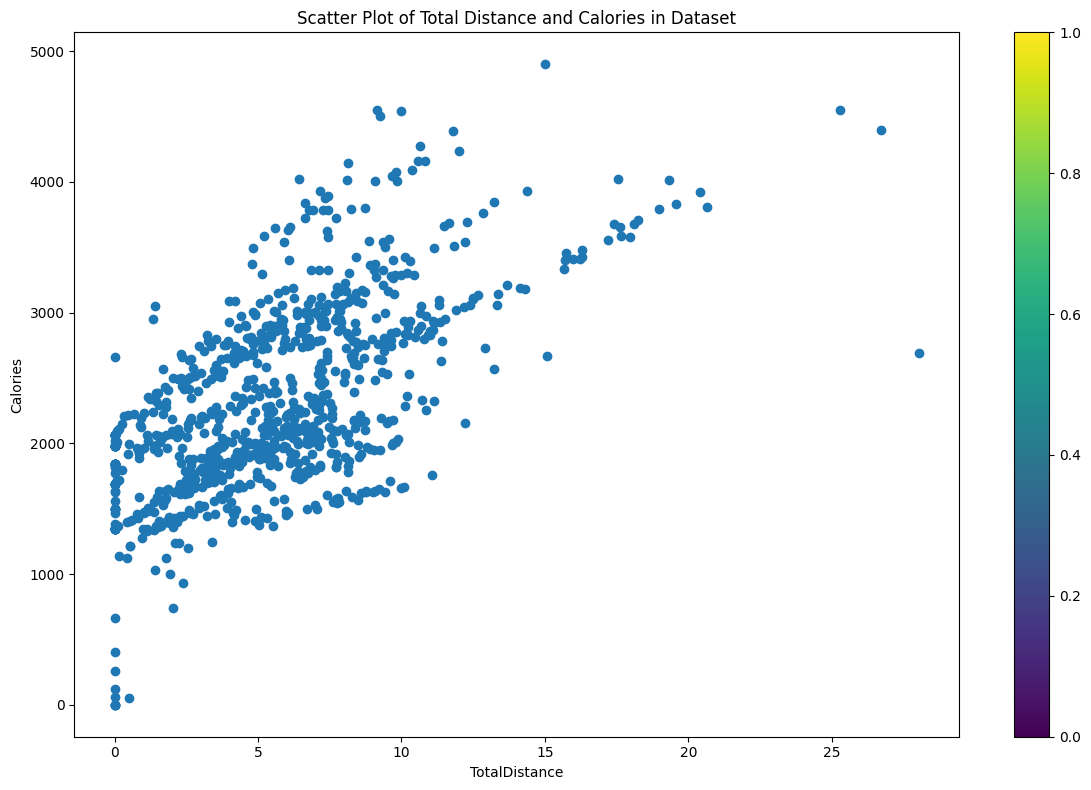

In [14]:
# Scatter plot of  Total Distance and Calories 
plt.figure(figsize=(12,8))
plt.scatter(dailyactivity_df['TotalDistance'], dailyactivity_df['Calories'])
 
# Adding Title to the Plot
plt.title("Scatter Plot of Total Distance and Calories in Dataset")
 
# Setting the X and Y labels
plt.xlabel('TotalDistance')
plt.ylabel('Calories')
plt.colorbar()
 
plt.show()

Some quick observations on the data
- clearly there are some zero values for Total Distance and Calories which we will need to clean up (i.e., remove) in data prep
- Concentration of users with total distance between 3 to 15 miles and Calories between 1000 to 4000
- Few outliers over 20 miles but still with Calories between 1000 to 4000. Although a couple over 25 miles with Calories over 4000


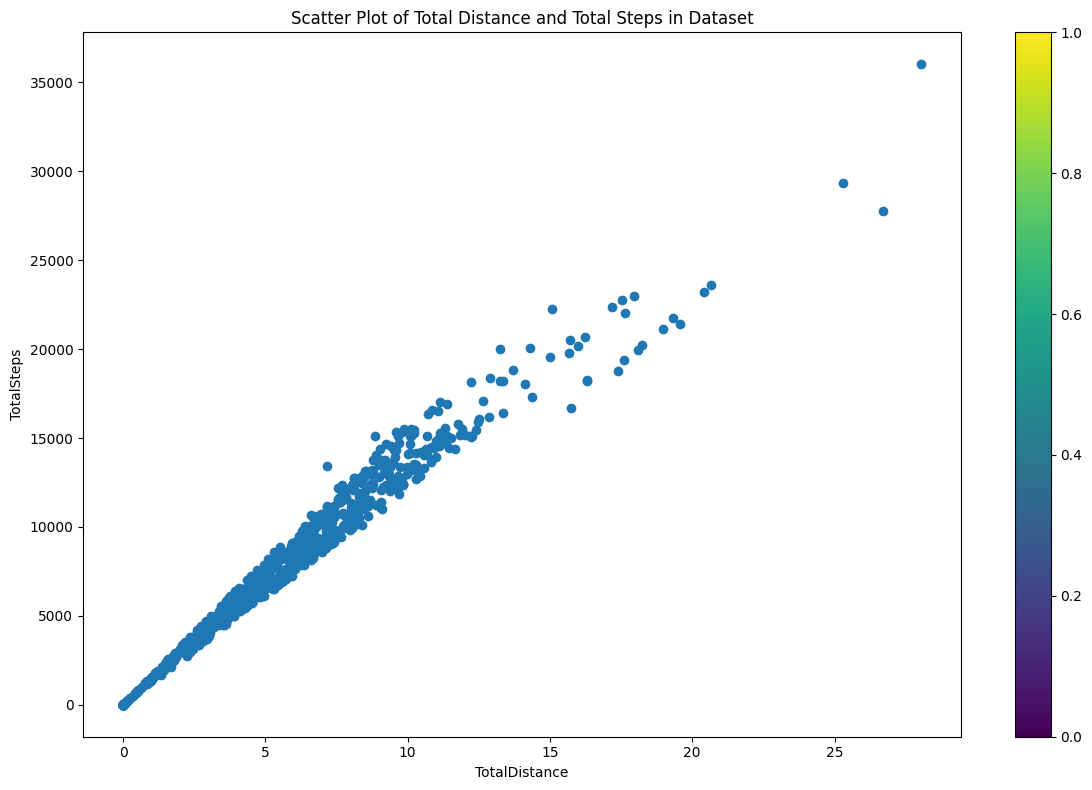

In [15]:
# Scatter plot of  Total Distance and Total Steps 
plt.figure(figsize=(12,8))
plt.scatter(dailyactivity_df['TotalDistance'], dailyactivity_df['TotalSteps'])
 
# Adding Title to the Plot
plt.title("Scatter Plot of Total Distance and Total Steps in Dataset")
 
# Setting the X and Y labels
plt.xlabel('TotalDistance')
plt.ylabel('TotalSteps')
plt.colorbar()
 
plt.show()

Strong correlation between Total Steps taken and Distance

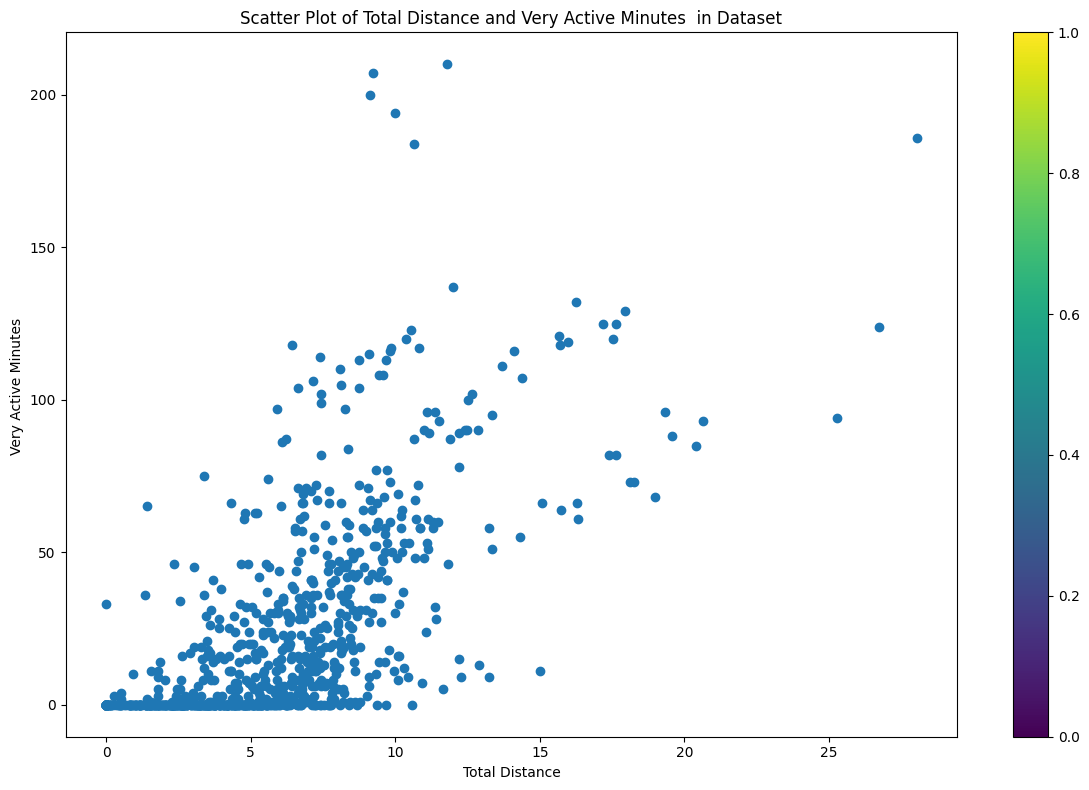

In [16]:
# Scatter plot of  Total Distance and Very Active Minutes 
plt.figure(figsize=(12,8))
plt.scatter(dailyactivity_df['TotalDistance'], dailyactivity_df['VeryActiveMinutes'])
 
# Adding Title to the Plot
plt.title("Scatter Plot of Total Distance and Very Active Minutes  in Dataset")
 
# Setting the X and Y labels
plt.xlabel('Total Distance')
plt.ylabel('Very Active Minutes ')
plt.colorbar()
 
plt.show()

Interesting observations with folks logging zero active minutes but recording values for Total Distance. Maybe Fitbit not working and bad data. These are candidates to be removed during data preparation (i.e., remove records where Very Active Minutes is zero)

We have 33 unique users in the dataset recording their activities over a number of days. Max no of days for some records is 31 days (i.e., one month)
Let's explore one user and visualize their activities over that one month period.

In [17]:
#Select a user from the dataset
dfuser1 = dailyactivity_df.query("`Id` == 1503960366")
dfuser1.head(5)


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


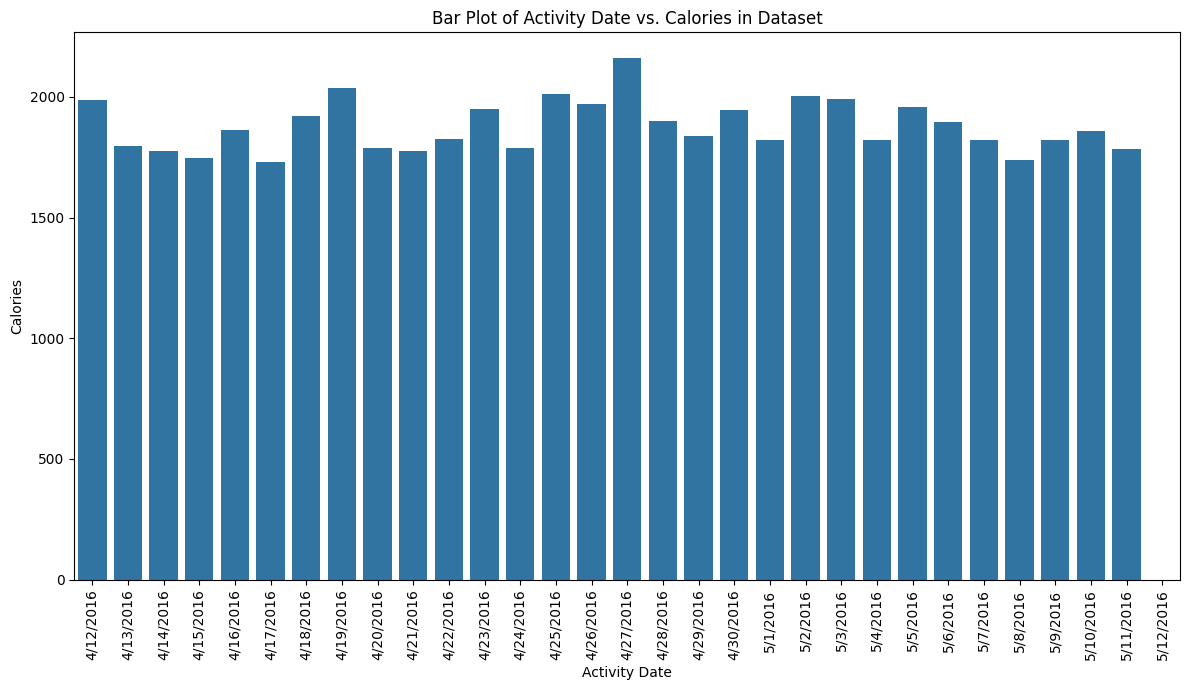

In [18]:
# Lets look at a bar plot of the Activity Date vs. Calories to see the distribution of data
plt.rcParams["figure.figsize"] = [12, 7]
plt.rcParams["figure.autolayout"] = True

ax = sns.barplot(x=dfuser1["ActivityDate"], y=dfuser1["Calories"])


# Adding Title to the Plot
ax.set_title('Bar Plot of Activity Date vs. Calories in Dataset')

# Rotating X-axis labels
plt.xticks(rotation = 90)

# Setting the X and Y labels
ax.set_xlabel('Activity Date')
ax.set_ylabel('Calories')
 
# Show the plot
plt.show()


In [19]:
dfuser1["Calories"].mean()

np.float64(1816.4193548387098)

User `1503960366` is a fairly active users over the number of days in the dataset with average of `1816` calories over the number of days above

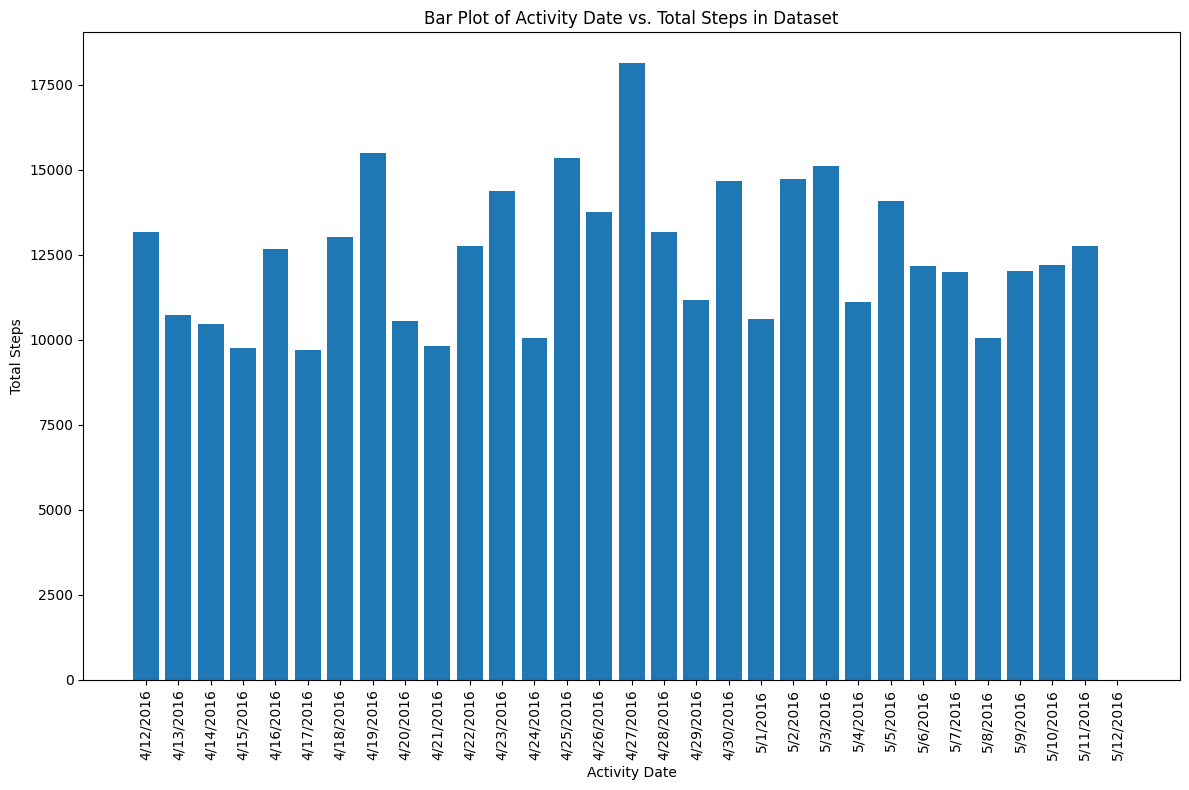

In [20]:
# Lets look at a bar plot of the Activity Date vs. Total Steps to see the distribution of data
fig, ax = plt.subplots(figsize=(12,8))
ax.bar(dfuser1["ActivityDate"],dfuser1["TotalSteps"])
# set a title and labels
ax.set_title('Bar Plot of Activity Date vs. Total Steps in Dataset')

# Rotating X-axis labels
plt.xticks(rotation = 90)

ax.set_xlabel('Activity Date')
ax.set_ylabel('Total Steps')
plt.show()

In [21]:
dfuser1["TotalSteps"].mean()

np.float64(12116.741935483871)

The average number of steps for User `1503960366` is `12,116` and supports the average Calories recorded

In [22]:
#Check which columns have zero values
#dailyactivity_df.all()
s = dailyactivity_df.eq(0).any()
s

Id                          False
ActivityDate                False
TotalSteps                   True
TotalDistance                True
TrackerDistance              True
LoggedActivitiesDistance     True
VeryActiveDistance           True
ModeratelyActiveDistance     True
LightActiveDistance          True
SedentaryActiveDistance      True
VeryActiveMinutes            True
FairlyActiveMinutes          True
LightlyActiveMinutes         True
SedentaryMinutes             True
Calories                     True
dtype: bool

All columns with the exception of ID and Activity Date have zero values. So will be removing rows with zero values after removing the features that are not required for modeling.

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [23]:
# List the dataset - first 5 records
dailyactivity_df.head(5)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


Lets remove the following features from the Dataset - LoggedActivitiesDistance, VeryActiveDistance, ModeratelyActiveDistance,  LightActiveDistance and SedentaryActiveDistance

In [24]:
# Drop the following columns
dailyactivity_df1 = dailyactivity_df.copy().dropna()
dailyactivity_df1.drop('LoggedActivitiesDistance', axis=1, inplace=True)
dailyactivity_df1.drop('VeryActiveDistance', axis=1, inplace=True)
dailyactivity_df1.drop('ModeratelyActiveDistance', axis=1, inplace=True)
dailyactivity_df1.drop('LightActiveDistance', axis=1, inplace=True)
dailyactivity_df1.drop('SedentaryActiveDistance', axis=1, inplace=True)

dailyactivity_df1.head(5)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,36,10,221,773,1863


In [25]:
print("Number of records in Dataset :", dailyactivity_df1.shape)

Number of records in Dataset : (940, 10)


Drop rows where Calories = zero and Total Distance = zero as these records are not useful

In [26]:
#Using drop() to delete rows based on column value
dailyactivity_df1.drop(dailyactivity_df1[dailyactivity_df1['Calories'] == 0].index, inplace = True)
dailyactivity_df1.drop(dailyactivity_df1[dailyactivity_df1['TotalDistance'] == 0].index, inplace = True)

In [27]:
print("Number of records in Dataset (after removing zero calorie records):", dailyactivity_df1.shape)

Number of records in Dataset (after removing zero calorie records): (862, 10)


Process this data file to calculate weight loss flag based on previous day calorie record
https://www.appsloveworld.com/pandas/100/189/how-to-create-a-new-column-based-on-row-value-in-previous-row-in-pandas-dataframe
 

In [28]:
dailyactivity_df1['weightloss'] = np.where(dailyactivity_df1['Calories'].shift(1) > dailyactivity_df1['Calories'],'1','0')
dailyactivity_df1.head(5)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,weightloss
0,1503960366,4/12/2016,13162,8.50,8.50,25,13,328,728,1985,0
1,1503960366,4/13/2016,10735,6.97,6.97,21,19,217,776,1797,1
2,1503960366,4/14/2016,10460,6.74,6.74,30,11,181,1218,1776,1
3,1503960366,4/15/2016,9762,6.28,6.28,29,34,209,726,1745,1
4,1503960366,4/16/2016,12669,8.16,8.16,36,10,221,773,1863,0


In [29]:
#Select a user from the dataset
dfuser2 = dailyactivity_df1.query("`Id` == 1503960366")
dfuser2.head(37)


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,weightloss
0,1503960366,4/12/2016,13162,8.50,8.50,25,13,328,728,1985,0
1,1503960366,4/13/2016,10735,6.97,6.97,21,19,217,776,1797,1
2,1503960366,4/14/2016,10460,6.74,6.74,30,11,181,1218,1776,1
3,1503960366,4/15/2016,9762,6.28,6.28,29,34,209,726,1745,1
4,1503960366,4/16/2016,12669,8.16,8.16,36,10,221,773,1863,0
5,1503960366,4/17/2016,9705,6.48,6.48,38,20,164,539,1728,1
6,1503960366,4/18/2016,13019,8.59,8.59,42,16,233,1149,1921,0
7,1503960366,4/19/2016,15506,9.88,9.88,50,31,264,775,2035,0
8,1503960366,4/20/2016,10544,6.68,6.68,28,12,205,818,1786,1
9,1503960366,4/21/2016,9819,6.34,6.34,19,8,211,838,1775,1


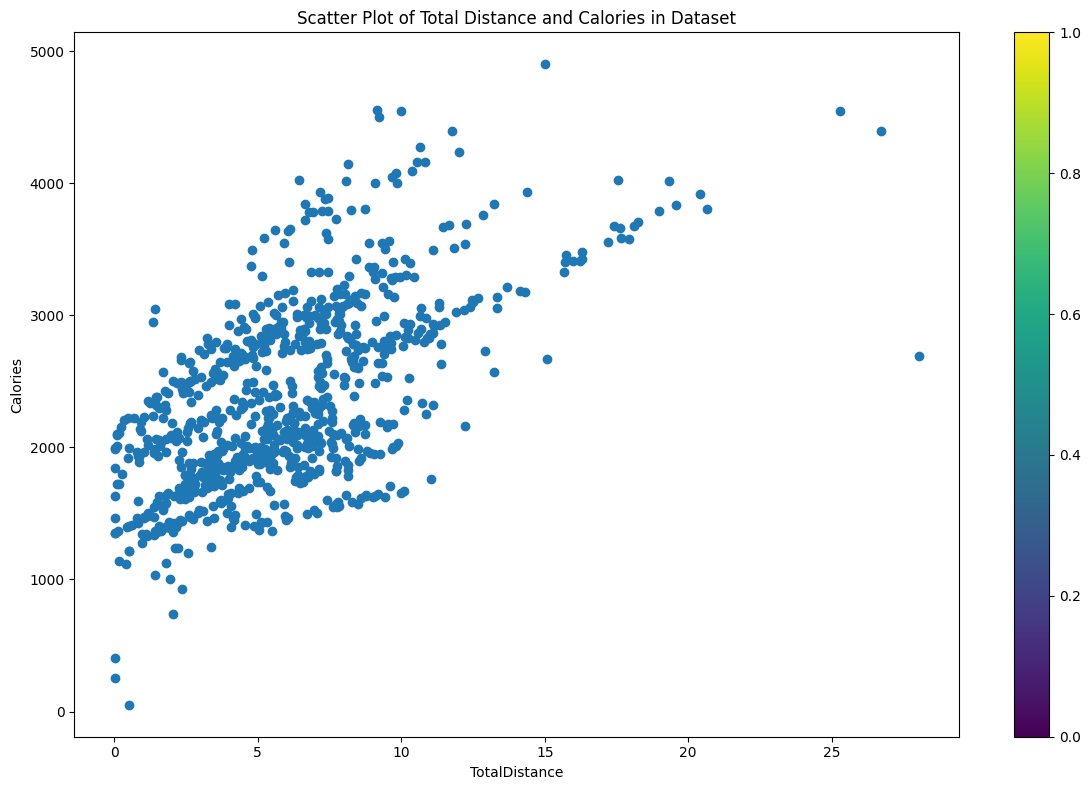

In [30]:
# Scatter plot of  Total Distance and Calories 
plt.figure(figsize=(12,8))
plt.scatter(dailyactivity_df1['TotalDistance'], dailyactivity_df1['Calories'])
 
# Adding Title to the Plot
plt.title("Scatter Plot of Total Distance and Calories in Dataset")
 
# Setting the X and Y labels
plt.xlabel('TotalDistance')
plt.ylabel('Calories')
plt.colorbar()
 
plt.show()

Zero records are removed but there are still some outliers with Total Distance close to zero and calories close to zero 

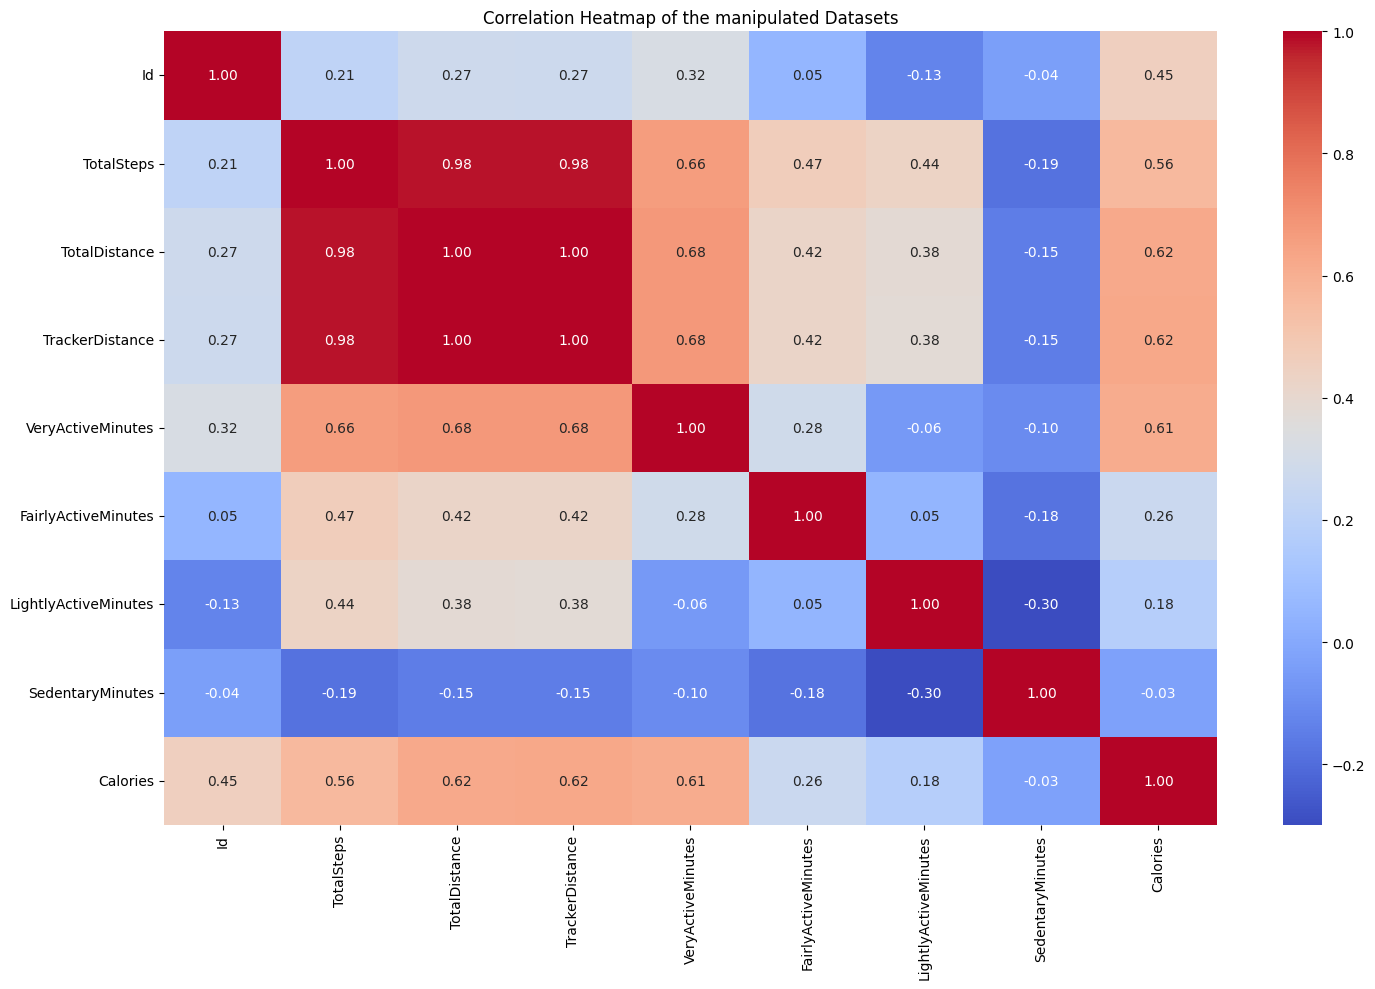

In [33]:
# Now lets look at the heatmap for the final data set

# Create a figure with specified size
plt.figure(figsize=(15, 10))

# Create seaborn heatmap
ax = sns.heatmap(dailyactivity_df1.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
ax.set_title("Correlation Heatmap of the manipulated Datasets")

# Show the plot in full screen
manager = plt.get_current_fig_manager()
manager.full_screen_toggle()
plt.tight_layout()
plt.show()

No major difference in correlation. The additional computed weighloss indication of Yes or No does not have a strong correlation with other features of the dataset.

### Modeling

With the final dataset in hand, it is now time to build some models.  In this section, we are going to build the following models to compare their accuracy, score and best parameters as applicable to the dataset:
- Logistic Regression
- K Nearest Neighbors (KNN)
- Support Vector  Machines (SVC)


Logistics regression, k-nearest neighbors (KNN), and support vector machines (SVMs) are all supervised learning algorithms. This means that they are used to learn a function from a set of data that has been labeled by a human.

Logistics regression is a type of regression analysis that is used to predict a binary outcome. In other words, it is used to predict whether or not an event will occur. For example, logistics regression could be used to predict whether or not a customer will default on a loan.

KNN is a nonparametric algorithm that is used to classify data. In other words, it is used to predict which class a new data point belongs to. KNN does this by finding the k nearest neighbors of the new data point and then voting on which class the new data point should belong to.

SVMs are a type of supervised learning algorithm that is used to classify data. Like KNN, SVMs are also nonparametric algorithms. SVMs work by finding a hyperplane that separates the data into two classes. The hyperplane is then used to classify new data points.

Main difference between logistics regression, k-nearest neighbors (KNN), and support vector machines (SVMs) is the type of problem that they are used to solve. Logistics regression is used to predict a binary outcome, KNN is used to classify data, and SVMs are also used to classify data.

For the modeling, we will drop features with String data types like Id and ActivityDate as it is not needed for the modeling. 

In [35]:
model_df1 = dailyactivity_df1.copy().dropna()
model_df1.drop('Id', axis=1, inplace=True)
model_df1.drop('ActivityDate', axis=1, inplace=True)
model_df1.head(5)

,TotalSteps,TotalDistance,TrackerDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,weightloss
0,13162,8.50,8.50,25,13,328,728,1985,0
1,10735,6.97,6.97,21,19,217,776,1797,1
2,10460,6.74,6.74,30,11,181,1218,1776,1
3,9762,6.28,6.28,29,34,209,726,1745,1
4,12669,8.16,8.16,36,10,221,773,1863,0


In [36]:
#List how many users are in this dataset
print("Number of Records used for Modeling: " , model_df1.shape)

Number of Records used for Modeling:  (862, 9)


### Simple Models for Logistic Regression, KNN and SVC

In [37]:
## Lets split the data to training and test sets, 70/30 split ratio so that we can assess how well the model 
## can predict weight loss
X = model_df1.drop(['weightloss'], axis = 1)
y = model_df1.weightloss

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [38]:
# Declare the list to store Train Time, Training Accuracy and Test Accuracy
ModelName = []
TrainTime = []
TrainAcc = []
TestAcc = []

In [39]:
%%time
#Building a Logistic Regression  model

# importing time module 
import time 

# record start time
start = time.time()

ModelName.append('Logistic')

lgr_pipe = Pipeline ([
    ('scale', StandardScaler(with_mean=False)),
    ('model', LogisticRegression())
])

# Train the classifiers
lgr = lgr_pipe.fit(X_train, y_train)

# use the model to predict the class labels of the test set:
lgr_pred = lgr.predict(X_test)

# Evaluate Training and Test Scores

lgr_train_score = lgr.score(X_train, y_train)
print("Training Accuracy Score", lgr_train_score)
TrainAcc.append(lgr_train_score)

lgr_test_score = lgr.score(X_test, y_test)
print("Test Accuracy Score", lgr_test_score)
TestAcc.append(lgr_test_score)

# record end time
end = time.time()
 
# printing elapsed time in nanoseconds
print("Time taken", end-start, "secs")
TrainTime.append(end-start)


Training Accuracy Score 0.6301824212271974
Test Accuracy Score 0.6640926640926641
Time taken 0.06855082511901855 secs
CPU times: total: 15.6 ms
Wall time: 68.8 ms


In [40]:
%%time

# record start time
start = time.time()

ModelName.append('KNN')

#Building a KNN  model

knn_pipe = Pipeline ([
    ('scale', StandardScaler(with_mean=False)),
    ('model', KNeighborsClassifier())
])

# Train the classifiers
knn = knn_pipe.fit(X_train, y_train)

# use the model to predict the class labels of the test set:
knn_pred = knn.predict(X_test)

# Evaluate Training and Test Scores

knn_train_score = knn.score(X_train, y_train)
print("Training Accuracy Score", knn_train_score)
TrainAcc.append(knn_train_score)

knn_test_score = knn.score(X_test, y_test)
print("Test Accuracy Score", knn_test_score)
TestAcc.append(knn_test_score)


# printing elapsed time in nanoseconds
print("Time taken", end-start, "secs")
TrainTime.append(end-start)

Training Accuracy Score 0.7545605306799337
Test Accuracy Score 0.5868725868725869
Time taken -1.153217077255249 secs
CPU times: total: 15.6 ms
Wall time: 86.3 ms


In [35]:
%%time
# record start time
start = time.time()

ModelName.append('SVM')

#Building a SVC model

svm_pipe = Pipeline ([
    ('scale', StandardScaler(with_mean=False)),
    ('model', SVC())
])

# Train the classifiers
svm = svm_pipe.fit(X_train, y_train)

# use the model to predict the class labels of the test set:
svm_pred = svm.predict(X_test)

# Evaluate Training and Test Scores

svm_train_score = svm.score(X_train, y_train)
print("Training Accuracy Score", svm_train_score)
TrainAcc.append(svm_train_score)
                
svm_test_score = svm.score(X_test, y_test)
print("Test Accuracy Score", svm_test_score)
TestAcc.append(svm_test_score)

# printing elapsed time in nanoseconds
print("Time taken", end-start, "secs")
TrainTime.append(end-start)


Training Accuracy Score 0.6733001658374793
Test Accuracy Score 0.6138996138996139
Time taken -0.05144000053405762 secs
CPU times: user 376 ms, sys: 9.47 ms, total: 385 ms
Wall time: 64.3 ms


In [41]:
# Display results in a Dataframe
results_df = ''
dict = {'Model':ModelName, 'Train Time(s)': TrainTime, 'Train Accuracy': TrainAcc, 'Test Accuracy': TestAcc}
results_df = pd.DataFrame(dict)
results_df

,Model,Train Time(s),Train Accuracy,Test Accuracy
0,Logistic,0.068551,0.630182,0.664093
1,KNN,-1.153217,0.754561,0.586873


KNN had the best training score and Logistic Regression had the best Test Accuracy. Logistic Regression was the fastest model to train.


###  Improving the Models for Logistic Regression, KNN and SVC

To improve the models, we use a process called Hyperparameter tuning with Grid search. Hyperparameter tuning is the process of finding the best values for the hyperparameters of a machine learning model. Grid search is a hyperparameter tuning technique in which a range of values is specified for each hyperparameter, and all possible combinations of values are evaluated.

Using Grid Search to create models with the different parameters and evaluate the performance metrics

In [42]:
#Looking up parameters that can be passed to the pipeline
lgr_pipe.get_params().keys()

dict_keys(['memory', 'steps', 'transform_input', 'verbose', 'scale', 'model', 'scale__copy', 'scale__with_mean', 'scale__with_std', 'model__C', 'model__class_weight', 'model__dual', 'model__fit_intercept', 'model__intercept_scaling', 'model__l1_ratio', 'model__max_iter', 'model__multi_class', 'model__n_jobs', 'model__penalty', 'model__random_state', 'model__solver', 'model__tol', 'model__verbose', 'model__warm_start'])

In [43]:
# Declare the list to store Train Time, Training Accuracy and Test Accuracy
ModelName1 = []
TrainTime1 = []
BestScore = []
BestParam = []

In [44]:
%%time
#Building a Logistic Regression  model



# importing the module
import time

# record start time
start = time.time()
 
# parameter grid
parameters = {
    'model__penalty' : ['l1','l2'], 
    'model__C'       : np.logspace(-3,3,7),
    'model__solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}

#
# Create an instance of GridSearch Cross-validation estimator
#
gsLR = GridSearchCV(estimator=lgr_pipe,
            param_grid=parameters,
            scoring='accuracy',
            cv=10)

# Train the LogisticRegression Classifier
#
gsLR = gsLR.fit(X_train, y_train)
gsLR_predicted = gsLR.predict(X_test)

#
# Print the training score of the best model
#
print('\n Logistic Regression - Grid Search best score -')
print(gsLR.best_score_)

#
# Print the model parameters of the best model
#
print('\nGrid Search best parameters -')
print(gsLR.best_params_)

print('\Grid Search CV Results -')
print(gsLR.cv_results_)

print("Best parameters set:")
print(gsLR.best_estimator_.steps)

#
# Print the test score of the best model
#
clfLR = gsLR.best_estimator_
print('Test accuracy: %.3f' % clfLR.score(X_test, y_test))

print("Best cross-validation score:", gsLR.best_score_)

score = gsLR.score(X_test, y_test)
print("Test Score :", score)

# record end time
end = time.time()
 
# printing elapsed time in nanoseconds
print("Time taken", end-start, "secs")

# Assign metrics to variables
ModelName1.append('Logistic')
TrainTime1.append(end-start)
BestScore.append(gsLR.best_score_)
BestParam.append(gsLR.best_params_)



 Logistic Regression - Grid Search best score -
0.6270765027322405

Grid Search best parameters -
{'model__C': np.float64(1.0), 'model__penalty': 'l2', 'model__solver': 'liblinear'}
\Grid Search CV Results -
{'mean_fit_time': array([0.00441606, 0.00302835, 0.0047616 , 0.00487623, 0.00768275,
       0.00508189, 0.00279133, 0.0027653 , 0.00332012, 0.0042099 ,
       0.00951951, 0.00516424, 0.00201421, 0.00199573, 0.00429885,
       0.00618436, 0.01416302, 0.00339203, 0.00230362, 0.00206609,
       0.01408858, 0.00741127, 0.02153132, 0.00797625, 0.00476425,
       0.00472536, 0.12812812, 0.00631096, 0.03161092, 0.00462773,
       0.00213525, 0.0020565 , 0.11549771, 0.00579743, 0.05382173,
       0.00565507, 0.00203698, 0.00264015, 0.10166781, 0.0078265 ,
       0.02537012, 0.00467904]), 'std_fit_time': array([0.00165866, 0.00078634, 0.0040252 , 0.00121586, 0.00142275,
       0.00379392, 0.00053819, 0.00132601, 0.00095406, 0.0003554 ,
       0.00243266, 0.00212598, 0.00021026, 0.00052856,

In [45]:
#Looking up parameters that can be passed to the pipeline
knn_pipe.get_params().keys()

dict_keys(['memory', 'steps', 'transform_input', 'verbose', 'scale', 'model', 'scale__copy', 'scale__with_mean', 'scale__with_std', 'model__algorithm', 'model__leaf_size', 'model__metric', 'model__metric_params', 'model__n_jobs', 'model__n_neighbors', 'model__p', 'model__weights'])

In [46]:
%%time
#Building a KNN Grid Search

# record start time
start = time.time()

# parameter grid
param_grid = {"model__n_neighbors": range(1, 18, 2)}

# Perform grid search with cross-validation
gsknn = GridSearchCV(knn_pipe, param_grid, cv=10, scoring='accuracy')
gsknn.fit(X_train, y_train)

gsknn_predicted = gsknn.predict(X_test)

#
# Print the training score of the best model
#
print('\nK Nearest Neighbor - Grid Search best score -')
print(gsknn.best_score_)

#
# Print the model parameters of the best model
#
print('\nGrid Search best parameters -')
print(gsknn.best_params_)

print('\Grid Search CV Results -')
print(gsknn.cv_results_)

print("Best parameters set:")
print(gsknn.best_estimator_.steps)

#
# Print the test score of the best model
#
clfknn = gsknn.best_estimator_
print('Test accuracy: %.3f' % clfknn.score(X_test, y_test))

print("Best cross-validation score:", gsknn.best_score_)

scoreknn = gsknn.score(X_test, y_test)
print("Test Score :", scoreknn)

# record end time
end = time.time()
 
# printing elapsed time in nanoseconds
print("Time taken", end-start, "secs")


# Assign metrics to variables
ModelName1.append('KNN')
TrainTime1.append(end-start)
BestScore.append(gsknn.best_score_)
BestParam.append(gsknn.best_params_)



K Nearest Neighbor - Grid Search best score -
0.6403825136612022

Grid Search best parameters -
{'model__n_neighbors': 17}
\Grid Search CV Results -
{'mean_fit_time': array([0.00491118, 0.00392478, 0.00404036, 0.00380671, 0.00365694,
       0.00410678, 0.00395508, 0.00470085, 0.00381274]), 'std_fit_time': array([0.00079542, 0.00082928, 0.00096658, 0.00087946, 0.00089576,
       0.00126921, 0.00118205, 0.00123642, 0.00087731]), 'mean_score_time': array([0.0069639 , 0.00515318, 0.00536695, 0.00422881, 0.00530078,
       0.0055335 , 0.00465162, 0.0058758 , 0.00610099]), 'std_score_time': array([0.00263997, 0.00100992, 0.00130309, 0.00032935, 0.00143528,
       0.00121688, 0.00105158, 0.00117851, 0.0018637 ]), 'param_model__n_neighbors': masked_array(data=[1, 3, 5, 7, 9, 11, 13, 15, 17],
             mask=[False, False, False, False, False, False, False, False,
                   False],
       fill_value=999999), 'params': [{'model__n_neighbors': 1}, {'model__n_neighbors': 3}, {'model__n

In [42]:
#Looking up parameters that can be passed to the pipeline
svm_pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'scale', 'model', 'scale__copy', 'scale__with_mean', 'scale__with_std', 'model__C', 'model__break_ties', 'model__cache_size', 'model__class_weight', 'model__coef0', 'model__decision_function_shape', 'model__degree', 'model__gamma', 'model__kernel', 'model__max_iter', 'model__probability', 'model__random_state', 'model__shrinking', 'model__tol', 'model__verbose'])

In [47]:
%%time
#Building a Support Vector Machine Grid Search

# record start time
start = time.time()

#Redfined the Pipeline
svm_pipegs = Pipeline ([
    ('scale', StandardScaler(with_mean=False)),
    ('model', SVC(probability=False))
])

# parameter grid

param_grid = {'model__C': [0.1,1, 10, 100], 'model__gamma': [1,0.1,0.01,0.001],'model__kernel': ['rbf', 'poly', 'sigmoid']}

param_grid_svc = [{
                    'model__C': [ 0.1, 0.5, 1.0 ],
                    'model__kernel': ['linear']
                  },
                 {
                    'model__C': [ 0.1, 0.5, 1.0 ],
                    'model__gamma': [0.1, 0.5, 1.0 ],
                    'model__kernel': ['rbf', 'poly', 'sigmoid']
                 }]

param_grid_svc1 = {
                    'model__C': [ 0.1, 0.5, 1.0 ],
                    'model__gamma': [0.1, 0.5, 1.0 ],
                    'model__kernel': ['rbf', 'poly', 'sigmoid']
                 }

param_grid_svc2 = {
                    'model__C': [ 0.1, 0.5, 1.0 ],
                    'model__kernel': ['rbf','linear']
                 }
#

#

#
# Create an instance of GridSearch Cross-validation estimator
#
gsSVC = GridSearchCV(estimator=svm_pipegs,
                     param_grid = param_grid_svc,
                     scoring='accuracy',
                     cv=10,
                     refit=True,
                     n_jobs=1)
#
# Train the SVM classifier
#
gsSVC.fit(X_train, y_train)
gsSVC_predicted = gsSVC.predict(X_test)

#
# Print the training score of the best model
#
print('\nSupport Vector Machine - Grid Search best score -')
print(gsSVC.best_score_)

#
# Print the model parameters of the best model
#
print('\nGrid Search best parameters -')
print(gsSVC.best_params_)

print('\Grid Search CV Results -')
print(gsSVC.cv_results_)

print("Best parameters set:")
print(gsSVC.best_estimator_.steps)

#
# Print the test score of the best model
#
clfSVC = gsSVC.best_estimator_
print('Test accuracy: %.3f' % clfSVC.score(X_test, y_test))

print("Best cross-validation score:", gsSVC.best_score_)

scoreSVC = gsSVC.score(X_test, y_test)
print("Test Score :", scoreSVC)

# record end time
end = time.time()
 
# printing elapsed time in nanoseconds
print("Time taken", end-start, "secs")

# Assign metrics to variables
ModelName1.append('SVM')
TrainTime1.append(end-start)
BestScore.append(gsSVC.best_score_)
BestParam.append(gsSVC.best_params_)




Support Vector Machine - Grid Search best score -
0.6567486338797814

Grid Search best parameters -
{'model__C': 1.0, 'model__gamma': 0.5, 'model__kernel': 'rbf'}
\Grid Search CV Results -
{'mean_fit_time': array([1.29083395e-02, 8.05718899e-03, 9.03122425e-03, 7.80160427e-03,
       9.10215378e-03, 1.12028122e-02, 1.00108385e-02, 2.39715171e-01,
       1.23504400e-02, 8.28673840e-03, 1.89745131e+00, 7.54072666e-03,
       6.99961185e-03, 1.59246922e-02, 1.28745317e-02, 9.67917442e-03,
       1.13404944e+00, 1.09873533e-02, 8.67695808e-03, 1.02410767e+01,
       8.93421173e-03, 7.87360668e-03, 2.34966993e-02, 1.02165699e-02,
       8.50315094e-03, 2.65671980e+00, 1.12494469e-02, 9.74750519e-03,
       2.12174272e+01, 7.59725571e-03]), 'std_fit_time': array([3.43001247e-03, 1.26083470e-03, 1.05610391e-03, 6.68748909e-04,
       1.53490048e-03, 2.16412032e-03, 2.29453063e-03, 4.29982371e-02,
       4.66978149e-03, 2.31619259e-03, 4.18889087e-01, 1.18483103e-03,
       2.99226245e-04, 2.

### Results

In [48]:
# Display results in a Dataframe
dict = {'Model':ModelName1, 'Train Time(s)': TrainTime1, 'Best Params': BestParam, 'Best Score': BestScore}
results_comp_df = pd.DataFrame(dict)
results_comp_df

,Model,Train Time(s),Best Params,Best Score
0,Logistic,7.763233,"{'model__C': 1.0, 'model__penalty': 'l2', 'model__solver': 'liblinear'}",0.627077
1,KNN,0.965701,{'model__n_neighbors': 17},0.640383
2,SVM,377.525910,"{'model__C': 1.0, 'model__gamma': 0.5, 'model__kernel': 'rbf'}",0.656749


SVM had the best score followed by KNN and SVM took the longest time to train, KNN was the fastest.

### Aggregations of Models

With the three models above producing a best score of 62% to 65%, we are going to explore an ensemble to make predictions to see if we can improve the accuracy score. The ensemble will use the same three models above of Logistic Regression, KNN, and Support Vector Machines.

In [49]:
## Lets split the data to training and test sets, 70/30 split ratio so that we can assess how well the model 
## can predict weight loss
X1 = model_df1.drop(['weightloss'], axis = 1)
y1 = model_df1.weightloss

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.3, random_state = 0)

Given the models below and the starter code, scale that data and train the models on the data, assigning the predictions as an array to the given dictionary.

In [50]:
models = [LogisticRegression(), KNeighborsClassifier(), SVC()]

results = {'logistic': [],
          'knn': [],
          'svc': []}

i = 0
for model in models:
    #fit the model
    model.fit(X1_train, y1_train)
    #make predictions
    results[list(results.keys())[i]] = model.predict(X1_test)
    i += 1

results

{'logistic': array(['1', '1', '1', '0', '1', '1', '1', '1', '1', '1', '0', '0', '1',
        '1', '0', '0', '1', '1', '1', '0', '0', '1', '0', '0', '1', '0',
        '1', '0', '0', '1', '1', '0', '1', '0', '0', '0', '0', '0', '0',
        '0', '0', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '1',
        '1', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '1',
        '0', '0', '1', '0', '0', '0', '1', '1', '0', '0', '1', '1', '0',
        '1', '0', '0', '1', '0', '1', '1', '0', '0', '1', '1', '1', '0',
        '0', '0', '1', '0', '1', '1', '1', '0', '0', '1', '1', '1', '0',
        '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '1', '1', '1',
        '0', '0', '1', '1', '0', '1', '1', '1', '0', '1', '1', '1', '1',
        '1', '1', '1', '0', '0', '0', '1', '0', '1', '1', '1', '1', '1',
        '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1',
        '1', '1', '1', '0', '0', '1', '1', '1', '1', '0', '1', '1', '0',
        '1', '1', '0', '0', '1', '0', '

Using your dictionary of predictions, create a DataFrame called prediction_df and add a column to the DataFrame named ensemble_prediction based on the majority vote of your predictions.

In [51]:
prediction_df = pd.DataFrame(results)
prediction_df['ensemble_prediction'] = prediction_df.mode(axis = 1).iloc[:, 0]
prediction_df.head()

,logistic,knn,svc,ensemble_prediction
0,1,0,1,1
1,1,1,1,1
2,1,1,1,1
3,0,0,0,0
4,1,1,1,1


Create a list of accuracy scores for each of the classifiers. Use this list with the columns to create a DataFrame named results_df to hold the accuracy scores of the classifiers. What rank was your ensemble?


In [52]:
from sklearn.metrics import accuracy_score
accuracies = []
for col in prediction_df.columns:
    accuracies.append(accuracy_score(y_test, prediction_df[col]))
accuracies

[0.6332046332046332, 0.528957528957529, 0.5984555984555985, 0.6138996138996139]

Create a voting ensemble using the VotingClassifier based on the majority vote using the same three classifiers svc, lgr, and knn. Assign the accuracy of the ensemble to vote_accuracy below.

In [53]:
from sklearn.ensemble import VotingClassifier
voter = ''
vote_accuracy = ''
    
voter = VotingClassifier([('svc', SVC()), ('lgr', LogisticRegression()), ('knn', KNeighborsClassifier())])
voter.fit(X_train, y_train)
vote_accuracy = voter.score(X_train, y_train)
vote_accuracy


0.6633499170812603

Create a new ensemble that makes predictions based on the probabilities of the estimators. Assign the ensemble voting paramete as soft_voter or hard_voter and determine the accuracy.

In [54]:
soft_voter = ''
soft_accuracy = ''
    
soft_voter = VotingClassifier([('svc', SVC(probability = True)), ('lgr', LogisticRegression()), ('knn', KNeighborsClassifier())], voting = 'soft')
soft_voter.fit(X_train, y_train)
soft_accuracy = soft_voter.score(X_train, y_train)
soft_accuracy

0.6898839137645107

In [55]:
hard_voter = ''
hard_accuracy = ''
    
hard_voter = VotingClassifier([('svc', SVC(probability = True)), ('lgr', LogisticRegression()), ('knn', KNeighborsClassifier())], voting = 'hard')
hard_voter.fit(X_train, y_train)
hard_accuracy = hard_voter.score(X_train, y_train)
hard_accuracy



0.6633499170812603

Weigh the classifiers differently. Use the Logistic Regression estimator as .5 of the weight in predicting based on majority votes, and the SVC and KNN as 0.25 each. See if this changes the accuracy of these predictions on the test data to weighted_acc.

In [56]:
weighted_vote = ''
weighted_vote = ''
    
weighted_voter = VotingClassifier([('svc', SVC(probability = True)), ('lgr', LogisticRegression()), ('knn', KNeighborsClassifier())],
                                 weights=[0.25, .5, .25])
weighted_voter.fit(X_train, y_train)
weighted_score = weighted_voter.score(X_train, y_train)

weighted_score

0.6550580431177446

With the aggregation of models, the average accuracy score of 63%+. Adding weights to the VotingClassifier produced the lowest accuracy score of 63.5%

### Findings

For this notebook, we are going to compare classifiers for predicting weight loss for Fitbit users.  We created models for for three classifiers (i.e., Logistic Regression, K-Nearest Neighbor (KNN) and Support Vector Machines (SVC) with the following findings:
- Comparing the Training and Testing Accuracy from the three models, KNN had the best training score of 75%  and Logistic Regression had the best Test Accuracy of 66%. Logistic Regression was the fastest model to train
- Using Hyperparameter tuning and Grid Search, SVM had the best score of 66% followed by KNN with 64% and SVM took the longest time to train, KNN was the fastest
- Using an ensemble of classifiers and adding weight for the three classifiers produced an average accuracy score of 63%+. Adding weights to the VotingClassifier produced the lowest accuracy score of 63.5%.

Overall, it looks like KNN has the best overall score and some models took a long time to train.